# Logistic Regression
## ID: eo9232
## Name: Md Reza
## CSC 5825 - Fall 2021 

In [1]:
import numpy as np
import pandas as pd
from numpy import *
from matplotlib import pyplot as plt

In [2]:
X = []  
y = []   

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
def loadDataSet():
    f=open('/content/drive/MyDrive/Colab Notebooks/datasets/Question5.txt')
    # Read data line by line and use strip to remove the Spaces 
    for line in f.readlines():
        nline=line.strip().split()
        # X has two columns
        X.append([float(nline[0]),float(nline[1])])
        y.append(int(nline[2]))
    return mat(X).T,mat(y)

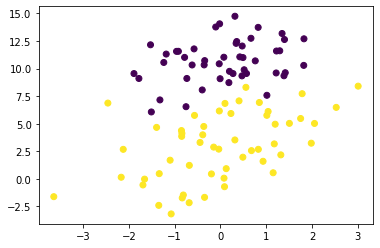

In [5]:
X,y=loadDataSet()
A = np.array(X)

b = np.array(y)
# Visualizing the dataset
plt.scatter(A[0], A[1], c=b)
plt.show()


In [6]:
def sigmoid(x):
    #==========
    #todo '''complete the sigmoid function'''
    #==========
    sig = 1 / (1 + np.exp(-x))
    return sig

In [7]:
def Logistic(X,y,W,b,n,alpha,iterations):
    
    '''
    X: input data
    y: labels
    W: weight
    b: bias
    n: number of samples
    alpha: learning rate
    iterations: the number of iteration
    '''
    
    J = zeros((iterations,1))
    for i in range(iterations):   
        
        # step1 forward propagation
        #==========
        #todo '''complete forward propagation equation'''
        #==========
        y_hat = sigmoid(np.dot(W,X)+b)
        # compute cost function
        #==========
        #todo '''complete compute cost function equation'''
        #==========
        J[i]=-1/n *(np.dot(y,np.log(y_hat.T))
                    +np.dot((1-y),np.log((1-y_hat).T)))
        # step2 backpropagation
        #==========
        #todo '''complete backpropagation equations'''
        #==========
        dy = y_hat-y
        dW = 1/n * np.dot(dy,X.T)
        db = 1/n * np.sum(dy)
        # step3 gradient descent
        #==========
        #todo '''complete gradientdescent equations'''
        #==========
        W = W-alpha*dW
        b = b-alpha*db

    return y_hat,W,b,J

In [8]:
def plotBestFit(X,y,J,W,b,n,y_hat):
    
    '''
    X: input data
    y: labels
    J: cost values
    W: weight
    b: bias
    n: number of samples
    y_hat: the predict labels from Logistic Regression 
    '''
    
    # Plot cost function figure
    #==========
    #todo '''complete the code to plot cost function results'''
    #==========
    plt.plot(J)
    plt.title(u'Cost function')
    plt.xlabel('Iteration');
    plt.ylabel('Cost');
    
    # Plot the final classification figure
    #==========
    #todo '''complete the code to Logistic Regression Classification Result'''
    #==========
    x1=[]; y1=[]
    x2=[]; y2=[]
    for i in range(n):
        if int(y[0,i])==1:
            x1.append(X[0,i])
            y1.append(X[1,i])
        else:
            x2.append(X[0,i])
            y2.append(X[1,i])
            
    fig2 = plt.figure(2)
    plt.scatter(x1,y1,c='b',marker='o')
    plt.scatter(x2,y2,c='r',marker='s')
    x=linspace(-3,3,100).reshape(100,1) 
    y=(-b-W[0,0]*x)/W[0,1]
    plt.plot(x,y,c='y')
    plt.title(u'Logistic Regression Classification Result')
    plt.xlabel(u'X - Feature')
    plt.ylabel(u'y - Label')
    
    plt.show()

In [9]:
num = X.shape[0]  # number of features
n = X.shape[1] # number of samples

In [10]:
# Initianlize the weights and bias
#==========
#todo '''complete the code to initianlize the weights and bias'''
#==========
W=np.random.randn(1,num)*0.01
b = 0

In [11]:
# Learning rate
#==========
#todo '''try different learning rates''
#==========
alpha= 0.03

In [12]:
# Iterations
#==========
#todo '''try different Iterations''
#==========
iterations = 4000

In [13]:
# Get the results from Logistic function
y_hat,W,b,J = Logistic(X, y, W, b, n, alpha, iterations)

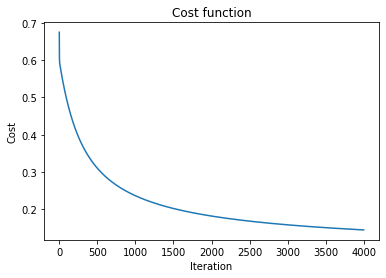

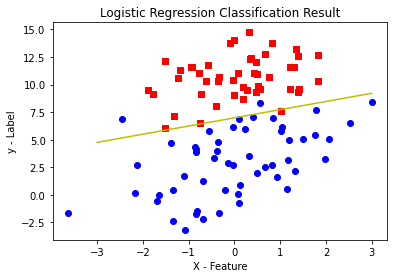

In [14]:
# Plot figures
plotBestFit(X, y, J, W, b, n, y_hat)